In [1]:
import pandas as pd 
import pandas as pd 

import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.neural_network import MLPClassifier

import cleaner as dc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
df = pd.read_csv('data/consensus_dataset.csv')
df

,ad,consensus
0,Everyone knows that using sunscreen is the bes...,1
1,Protection from UV rays is important. That's w...,1
2,"""Sun protection every day, not just in the sum...",1
3,"The more people you know and places you visit,...",1
4,join thousands of people in fredericton who ar...,1
...,...,...
3326,What does it mean to be a changemaker in the d...,1
3327,Learn and create together. Join our community ...,1
3328,Join our community to get expert whelping advi...,1
3329,A loftier lifestyle awaits you. New luxury ele...,1


In [5]:
# remove adjectives 
df['ad'] = df['ad'].apply(dc.remove_adjectives)

# Lower case
df['ad']= df['ad'].apply(lambda x: x.lower())

# Removing punctuations
df['ad']= df['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df['ad']= df['ad'].str.replace('\d+','',regex=True)

# Removing extra space 
df['ad']= df['ad'].str.replace('\s+', ' ',  regex=True)

#Apply function on review column
df['ad']= df['ad'].apply(dc.denoise_text)

#Apply function on review column
df['ad']= df['ad'].apply(dc.remove_stopwords)


#Apply function on review column
df['ad']= df['ad'].apply(dc.simple_stemmer)

In [7]:
X_train_sequences,  X_test_sequences, y_train, y_test  = train_test_split(df['ad'], df['consensus'], test_size =0.1  , random_state = 42)

In [8]:
# Use term frequency to represent documents
tf_vectorizer = CountVectorizer() 

X_train = tf_vectorizer.fit_transform(X_train_sequences)
X_test = tf_vectorizer.transform(X_test_sequences)

In [9]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

accuracy:   0.928
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       130
           1       0.93      0.96      0.94       204

    accuracy                           0.93       334
   macro avg       0.93      0.92      0.92       334
weighted avg       0.93      0.93      0.93       334

confusion matrix:
[[115  15]
 [  9 195]]



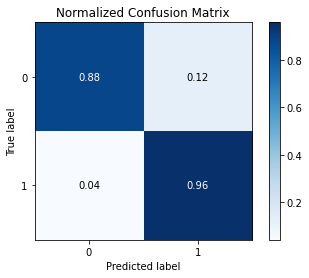

In [10]:
# predict the labels on validation dataset
predictions = clf.predict(X_test)

# compute the performance measures
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['0', '1']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()

In [11]:
df_val = pd.read_csv('data/sample.csv')

# remove adjectives 
df_val['ad'] = df_val['ad'].apply(dc.remove_adjectives)

# Lower case
df_val['ad']= df_val['ad'].apply(lambda x: x.lower())

# Removing punctuations
df_val['ad']= df_val['ad'].str.replace('[^\w\s]','', regex=True)

# Removing extra space 
df_val['ad']= df_val['ad'].str.replace('\s+', ' ', regex=True)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.remove_stopwords)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.denoise_text)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.simple_stemmer)

accuracy:   0.836
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        40
           1       0.88      0.91      0.89       131

    accuracy                           0.84       171
   macro avg       0.77      0.75      0.76       171
weighted avg       0.83      0.84      0.83       171

confusion matrix:
[[ 24  16]
 [ 12 119]]



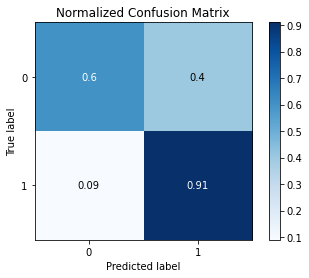

In [30]:
X_val_tf = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['emotion']
predictions = clf.predict(X_val_tf)

# compute the performance measures
score = metrics.accuracy_score(y_val, predictions)
print("accuracy:   %0.3f" % score)


print(metrics.classification_report(y_val, predictions, target_names=['0', '1']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_val, predictions, normalize=True)
plt.show()